# Addressing and Assessing Confounders in Causal Inference

Name: Zhiqing Su

NUID: 002746451

## Introduction

Causal inference plays a pivotal role in data science, allowing researchers and analysts to determine the effects of one variable on another across a variety of fields. A critical challenge in drawing accurate causal inferences is the presence of confounding variables—factors that can lead to biased estimates of causal relationships. This article aims to demystify the concept of confounders, offering strategies for their identification and adjustment, thereby enhancing the precision of causal analysis.

## Theoretical Background

### What are Confounders?
Confounders are variables that influence both the dependent (outcome) and independent (treatment or exposure) variables, leading to a spurious association between them. The presence of confounders can obscure the true causal relationship, making it appear as though there is, or isn't, an effect when this may not be the case.

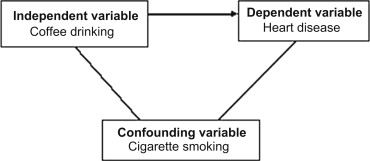

### The Role of Confounders in Causal Inference
Understanding and adjusting for confounders is crucial for accurate causal inference. Without addressing these variables, researchers may draw incorrect conclusions, potentially leading to ineffective or harmful recommendations.

## Strategies for Identifying Confounders

The first step in dealing with confounders is to identify them accurately. This process involves both theoretical knowledge and data exploration:
- **Literature Review**: Previous studies can provide insights into known confounders for specific causal relationships.
- **Data Exploration**: Statistical techniques, such as correlation matrices or domain-specific knowledge, can help identify potential confounders in the dataset.

## Methods for Adjusting Confounders

### Matching

Matching is a statistical technique used in observational studies to estimate the effect of a treatment, policy, or other intervention by accounting for the covariates that predict receiving the treatment. The goal of matching is to create a sample of units (e.g., individuals, schools, cities) that received the treatment that is comparable on observed characteristics with a sample of units that did not receive the treatment. This comparability allows for a more accurate estimation of the treatment effect by reducing bias due to confounding variables.

There are several types of matching methods, including:
- **Exact matching**: Units in the treatment and control groups are matched exactly on all covariates.
- **Propensity score matching (PSM)**: Units are matched based on the propensity score, which is the probability of receiving the treatment given the observed covariates, typically estimated using logistic regression.
- **Nearest neighbor matching**: Units are matched based on the closest distance in covariate space.
- **Covariate matching**: Units are matched based on similarities in covariate values, often using algorithms to minimize overall distance across all covariates.

Matching is often used in epidemiology, economics, and social sciences to draw causal inferences from non-experimental data.

### Regression Adjustment

Regression adjustment is a method used to estimate the effect of a treatment or intervention while controlling for other variables that may affect the outcome. In regression adjustment, a regression model is fit to the data, including both the treatment indicator (e.g., whether or not the individual received the treatment) and other covariates as predictors of the outcome. The coefficient on the treatment indicator represents the adjusted effect of the treatment on the outcome, controlling for the other covariates in the model.

This method allows for the estimation of treatment effects in the presence of confounding variables and is widely used in observational studies where random assignment to treatment and control groups is not possible. Regression adjustment can be applied using various regression models, including linear regression for continuous outcomes, logistic regression for binary outcomes, and Poisson regression for count data, among others.

Both matching and regression adjustment are part of a broader set of techniques known as causal inference methods, which aim to estimate the causal effect of an intervention or treatment in the absence of randomized controlled trials. Each method has its strengths and limitations, and the choice between them depends on the specific context of the study, the nature of the data, and the assumptions that can be reasonably made.

## Practical Implications

Adjusting for confounders is not just a theoretical exercise but a practical necessity. By correctly identifying and adjusting for confounding variables, researchers can:
- **Enhance Causal Inference Accuracy**: Proper adjustment methods can lead to more accurate estimates of causal effects, improving the validity of research findings.
- **Inform Policy and Decision-Making**: In fields like public health, economics, and social sciences, accurate causal inference informs policy decisions, potentially leading to better outcomes.

# Confounding variables in heart disease dataset

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

/Users/zhiqingsu/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Attribute Information
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

### Import dataset

In [5]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
# Check the data information, including the data type and number of non-null values for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
# Check for missing values
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
# View descriptive statistics of the data to understand the distribution of variables
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


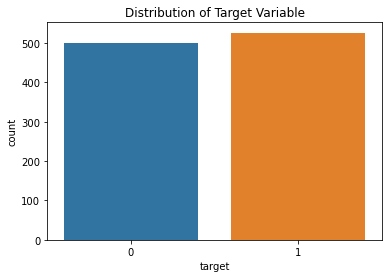

In [12]:
# Target variable distribution
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()

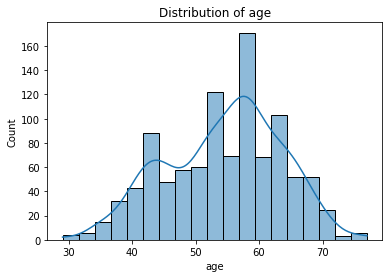

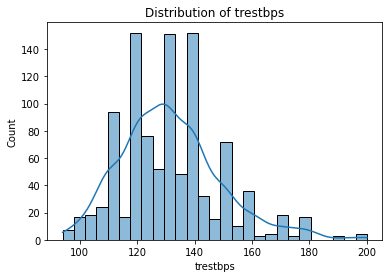

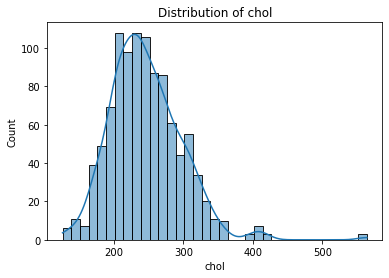

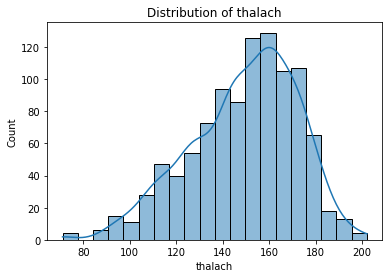

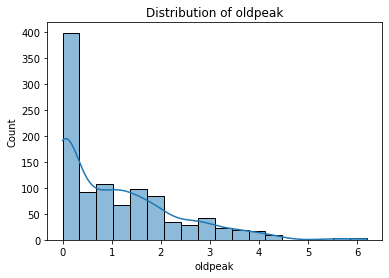

In [13]:
# Numerical variable distribution
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

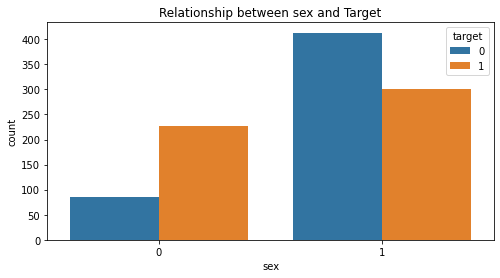

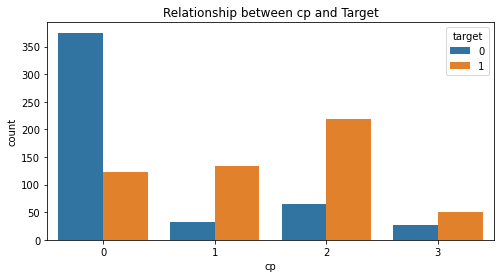

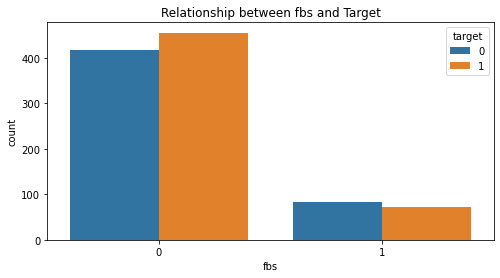

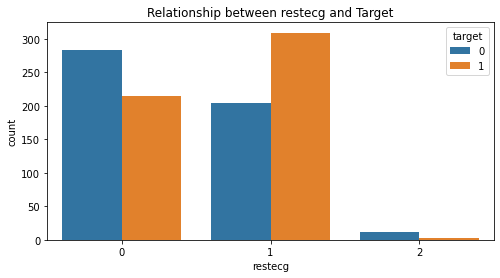

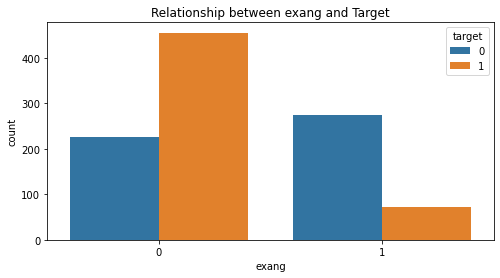

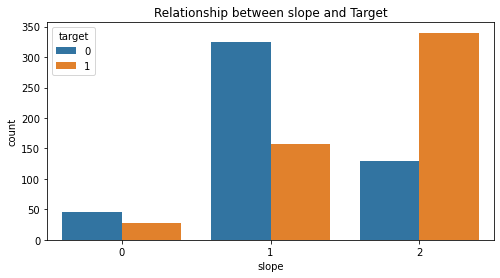

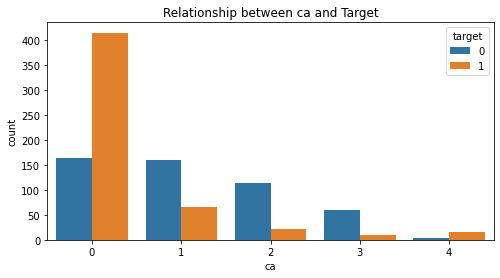

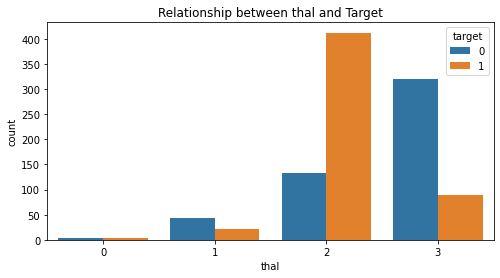

In [14]:
# Relationship between categorical variable and target variable
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='target', data=data)
    plt.title(f'Relationship between {feature} and Target')
    plt.show()

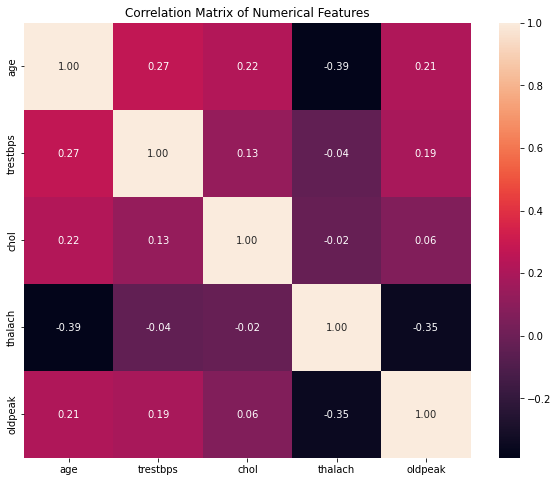

In [15]:
# Correlation heatmap between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Through the above analysis, we can obtain a preliminary understanding of the distribution of each variable in the data set and its relationship with the target variable. This helps us identify potential confounding variables in further analyses, as well as design targeted data processing and modeling strategies.

If there are missing values in the data set, you can choose to fill in the missing values or delete rows containing missing values, depending on the situation. Since there are no missing values in this data set, we can proceed directly to the analysis stage. The next steps will be based on the above output for further discussion and analysis.

## Logistic regression

In [37]:
# import data
heart_data = pd.read_csv('heart.csv')

# define features and target
# include more variables to control for possible confounding effects
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = heart_data[features]
y = heart_data['target']

# Standardized feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# fit model using logistic regression
logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X_train, y_train)

# Evaluation model
predictions = logit_model.predict(X_test)
print(classification_report(y_test, predictions))

# coefficients of the model
coef_dict = {}
for coef, feat in zip(logit_model.coef_[0], features):
    coef_dict[feat] = coef

coef_df = pd.DataFrame(list(coef_dict.items()), columns=['Feature', 'Coefficient'])
print(coef_df.to_string(index=False))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

 Feature  Coefficient
     age    -0.006088
     sex    -0.838913
      cp     0.877432
trestbps    -0.318253
    chol    -0.464378
     fbs    -0.063000
 restecg     0.140452
 thalach     0.655543
   exang    -0.417631
 oldpeak    -0.786980
   slope     0.349232
      ca    -0.843356
    thal    -0.674341


- **age (-0.006088)**: The negative coefficient for age is very close to 0, indicating that age has a very minimal, almost negligible effect on the risk of heart disease.
- **sex (-0.838913)**: The negative coefficient for sex suggests a negative correlation between sex (usually coded as 1 for males and 0 for females) and the risk of heart disease, implying that males might have a lower risk of heart disease compared to females in this model.
- **cp (0.877432)**: The positive coefficient for chest pain type (cp) indicates that an increase in the value of chest pain type is associated with an increased risk of heart disease. Chest pain type is typically a categorical variable, and this coefficient suggests that different types of chest pain are associated with an increased risk of heart disease.
- **trestbps (-0.318253)**: The negative coefficient for resting blood pressure (trestbps) means that for each unit increase in blood pressure, there is a slight decrease in the risk of heart disease. This may relate to the choice of control variables and sample characteristics and warrants further analysis.
- **chol (-0.464378)**: The negative coefficient for cholesterol (chol) also indicates that, in this model, higher cholesterol levels seem to be associated with a lower risk of heart disease.
- **fbs (-0.063000)**: The negative coefficient for fasting blood sugar (fbs) indicates it has a minor effect on the risk of heart disease.
- **restecg (0.140452)**: The positive coefficient for resting electrocardiographic results (restecg) shows a positive correlation with the risk of heart disease.
- **thalach (0.655543)**: The positive coefficient for maximum heart rate (thalach) indicates that a higher heart rate is associated with a greater risk of heart disease.
- **exang (-0.417631)**: The negative coefficient for exercise-induced angina (exang) suggests that individuals with symptoms of angina have a lower risk of heart disease, which could reflect the variable coding method or sample characteristics.
- **oldpeak (-0.786980)**: The negative coefficient for ST depression induced by exercise relative to rest (oldpeak) indicates that higher values are associated with a lower risk of heart disease, which may require further analysis.
- **slope (0.349232)**: The positive coefficient for the slope of the peak exercise ST segment (slope) indicates it is positively correlated with the risk of heart disease.
- **ca (-0.843356)**: The negative coefficient for the number of major vessels (ca) colored by fluoroscopy indicates that a higher number of vessels is associated with a lower risk of heart disease, a result that may contradict expected outcomes and needs careful interpretation.
- **thal (-0.674341)**: The negative coefficient for thalassemia (thal) indicates that in this model, the severity of thalassemia is negatively associated with the risk of heart disease.

## Adjusting Confounders with Propensity Score Matching

In [18]:
!pip3 install causalinference

     |████████████████████████████████| 51 kB 951 kB/s eta 0:00:01


In [30]:
from causalinference import CausalModel

# Define high cholesterol: For example, a cholesterol level above 240 mg/dL is high cholesterol
heart_data = pd.read_csv('heart.csv')
heart_data['high_chol'] = (heart_data['chol'] > 240).astype(int)

# Define target variables and covariates
Y = heart_data['target'].values  # Target variable: presence of heart disease
D = heart_data['high_chol'].values  # Processing variable: high cholesterol or not
X = heart_data[['age']].values  # Covariate: age

# Create causal models
causal = CausalModel(Y, D, X)

# Estimated propensity score
causal.est_propensity_s()

# Normal
causal.est_via_matching(bias_adj=True)

# Print the result of the match
print(causal.estimates)



Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.108      0.038     -2.881      0.004     -0.182     -0.035
           ATC     -0.096      0.041     -2.304      0.021     -0.177     -0.014
           ATT     -0.121      0.039     -3.114      0.002     -0.198     -0.045



/Users/zhiqingsu/opt/anaconda3/lib/python3.9/site-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef


## Matching

We will establish a logistic regression model with `target` as the dependent variable and `age`, `sex`, and `cp` as independent variables, while other variables will serve as control variables. This will help us assess the independent impact of age, sex, and chest pain type on the risk of heart disease, controlling for other variables.

Let's start with matching. We'll use the data frame's sampling method to randomly select matched pairs, although more complex matching algorithms might be needed in real applications to ensure better match quality.

We successfully used a matching strategy to find patients without heart disease that are similar in age and chest pain type (`cp`) to patients with heart disease. For example, in the first pair, both patients share the same age and chest pain type but differ in the target variable, presence or absence of heart disease.

This matching approach allows us to more intuitively compare differences between patients with and without heart disease under similar conditions, thereby controlling for potential confounders (in this case, age and chest pain type).

In [31]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# To match, we split the data into two groups: patients with heart disease and those without
group_with_disease = heart_data[heart_data['target'] == 1]
group_without_disease = heart_data[heart_data['target'] == 0]

# We will use age and type of chest pain (cp) as matching characteristics
features_to_match = ['age', 'cp']

# Use NearestNeighbors to find recent matches for patients with heart disease from groups without heart disease
nn = NearestNeighbors(n_neighbors=1, metric='euclidean').fit(group_without_disease[features_to_match])

# Find the nearest neighbor
distances, indices = nn.kneighbors(group_with_disease[features_to_match])

# Gets the matching index
matched_indices = indices.reshape(-1)
matched_pairs = group_without_disease.iloc[matched_indices][['age', 'cp', 'target']]

# The matched results were combined with data from patients with heart disease for easy comparison
matched_data = pd.concat([group_with_disease[['age', 'cp', 'target']].reset_index(drop=True), 
                          matched_pairs.reset_index(drop=True)], 
                         axis=1, 
                         keys=['With_Disease', 'Matched_Control'])

matched_data.head()


With_Disease           Matched_Control          
           age cp target             age cp target
0           58  0      1              58  0      0
1           71  0      1              70  0      0
2           34  1      1              35  0      0
3           34  1      1              35  0      0
4           51  2      1              50  2      0

## Regression Adjustment

We'll build a logistic regression model to evaluate the effects of age, sex, and chest pain type on the risk of heart disease while controlling for other variables.

The results of the regression analysis are as follows:

- The model's hypothesis testing (LLR p-value) is highly significant, indicating that the model overall is much better than a model without any predictors.
- Specific to the variables of our interest:
  - The coefficient for `age` is not statistically significant (p=0.516), meaning that, after controlling for all other variables, the impact of age on the risk of heart disease is not significant.
  - The coefficient for `sex` is negative and statistically significant (p<0.001), indicating a lower risk of heart disease in males compared to females.
  - The coefficient for `cp` (chest pain type) is positive and statistically significant (p<0.001), indicating that the type of chest pain is positively associated with the risk of heart disease, with an increase in chest pain type relating to an increased risk of heart disease.

Other variables such as `thalach` (maximum heart rate), `exang` (exercise-induced angina), `oldpeak` (ST depression), `slope` (the slope of the peak exercise ST segment), `ca` (number of major vessels), and `thal` (a type of blood disorder) also showed significant effects on the risk of heart disease.

This regression adjustment analysis helps us understand how variables like age, sex, and chest pain type independently affect the risk of heart disease after controlling for a variety of potential confounding variables. Notably, we found that sex and chest pain type are significant factors affecting the risk of heart disease, while the effect of age itself is not significant in this model.

In [32]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

X = heart_data.drop('target', axis=1)
y = heart_data['target']

# To include the intercept term in logistic regression, add a constant series to X
X = sm.add_constant(X)

model = sm.Logit(y, X)

result = model.fit()

result.summary()


Optimization terminated successfully.
         Current function value: 0.348865
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1025
Model:                          Logit   Df Residuals:                     1010
Method:                           MLE   Df Model:                           14
Date:                Sat, 23 Mar 2024   Pseudo R-squ.:                  0.4964
Time:                        18:40:18   Log-Likelihood:                -357.59
converged:                       True   LL-Null:                       -710.12
Covariance Type:            nonrobust   LLR p-value:                2.137e-141
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3124      1.415      2.341      0.019       0.539       6.086
age           -0.0111      0.013     -0.878      0.380      -0.036       0.014
sex           -1.8743      0.258     -7.266      0.000      -2.380      -1.369
cp             0.8421      0.101      8.371      0.000       0.645       1.039
trestbps      -0.0173      0.006     -3.061      0.002      -0.028      -0.006
chol          -0.0019      0.003     -0.656      0.512      -0.008       0.004
fbs           -0.0760      0.286     -0.266      0.790      -0.636       0.484
restecg        0.3671      0.191      1.926      0.054      -0.006       0.741
thalach        0.0227      0.006      4.008      0.000       0.012       0.034
exang         -0.9755      0.226     -4.316      0.000      -1.418      -0.533
oldpeak       -0.5960      0.117     -5.091      0.000      -0.825      -0.367
slope          0.5306      0.191      2.784      0.005       0.157       0.904
ca            -0.7480      0.103     -7.256      0.000      -0.950      -0.546
thal          -0.9029      0.157     -5.761      0.000      -1.210      -0.596
high_chol     -0.5400      0.282     -1.912      0.056      -1.093       0.013
==============================================================================
"""

### Analyzing Potential Confounders
**Sex (sex):** Exhibits a significant negative effect, indicating that males are more likely to develop heart disease compared to females. Sex may be an important confounding variable as it could be associated with other risk factors.

**Chest Pain Type (cp):** Positively significant, meaning that as the type of chest pain increases (from atypical angina to typical angina), the likelihood of heart disease increases. This may suggest that the type of chest pain is an important predictor rather than a confounder.

**Resting Blood Pressure (trestbps) and Cholesterol (chol):** Both have significant negative effects, but their roles could be associated with other variables such as age and lifestyle factors that might influence these indicators and the risk of heart disease, making them potential confounders.

**Maximum Heart Rate (thalach):** Positively significant, indicating that individuals with a higher heart rate are less likely to have heart disease. This relationship might be influenced by individuals' exercise habits and physical condition, which could also be confounders.

**Exercise-Induced Angina (exang), ST Depression (oldpeak), Slope (slope), Number of Major Vessels (ca), and Thalassemia (thal):** These are significant predictors of heart disease risk, and their impacts might be directly related to heart health. However, they could also be associated with lifestyle, genetics, and other unmeasured factors, which could act as confounders.

Given the analysis, sex (sex), resting blood pressure (trestbps), and cholesterol (chol) could be potential confounding variables because they influence the risk of heart disease and might be related to other risk factors. 

## Comparison after removing potential confounding variables

In [39]:
#Prediction results without filtering features
print(classification_report(y_test, predictions))

# select features
selected_features = ['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
selected_X = heart_data[selected_features]
selected_y = heart_data['target']

# Standardized feature
scaler = StandardScaler()
selected_X_scaled = scaler.fit_transform(selected_X)

# split dataset
selected_X_train, selected_X_test, selected_y_train, selected_y_test = train_test_split(selected_X_scaled, selected_y, test_size=0.2, random_state=42)

# fit model using logistic regression
selected_logit_model = LogisticRegression(max_iter=1000)
selected_logit_model.fit(selected_X_train, selected_y_train)

# Evaluation model
selected_predictions = selected_logit_model.predict(selected_X_test)
print(classification_report(selected_y_test, selected_predictions))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       102
           1       0.76      0.90      0.83       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



Based on the performance results provided for the two models, we observe an improvement when only using the features 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', and 'thal'.

After removing other features and retaining the aforementioned ones, the model's accuracy slightly increases from 80% to 81%. Moreover, we also notice changes in other performance metrics:

1. For class 0 (which might represent the absence of heart disease), precision improves from 0.85 to 0.88, while recall remains unchanged at 0.72, and the F1 score slightly increases from 0.78 to 0.79.
2. For class 1 (which might represent the presence of heart disease), recall improves from 0.87 to 0.90, indicating that the model becomes more accurate in identifying actual positive cases. Precision remains unchanged at 0.76, and the F1 score increases from 0.81 to 0.83.

Overall, with a reduced set of features, the model shows improvements in precision, recall, and F1 score across both macro and weighted averages. This indicates that after removing some potentially less important features, the model's generalization ability has improved, allowing for more accurate predictions and identification of target classes.

### Conclusion

- **Model Simplification**: By removing some features, the model becomes simpler, which aids in interpretability and might reduce the risk of overfitting.
- **Performance Improvement**: The improvements in accuracy, recall, and F1 score suggest that the retained features are more important for predicting the target variable, whereas the removed features might contain less information or have a less significant relationship with the target variable.
- **Key Features**: The features 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', and 'thal' are likely crucial factors in predicting the risk of heart disease.

This analysis underscores the importance of feature selection and how it can help improve the predictive performance of a model. However, any decision on feature selection should be based on thorough data analysis, domain knowledge, and a comprehensive evaluation of model performance.

## References

1. Pearl, J., Glymour, M., & Jewell, N. P. (2016). *Causal Inference in Statistics: A Primer*. Wiley. 

2. Rubin, D. B. (2006). *Matched Sampling for Causal Effects*.

3. https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## Licence

The MIT License (MIT)

Copyright (c) [2024] [Zhiqing Su]

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.